# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

## Load the data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [56]:
data_1 = pd.read_csv('Categorical.csv')
data_1

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [17]:
data_1['continent'] = data_1['continent'].map({'North America': 0, 'Asia':1, 'Europe':2,'Oceania': 3, 'Africa':4 ,'Antarctica':5,'Seven seas (open ocean)':6, 'South America':7})

In [18]:
data_1

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,4
239,Zambia,27.774759,-13.458242,4


## Select the features

In [19]:
data = data_1.copy()
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,4
239,Zambia,27.774759,-13.458242,4


In [20]:
x = data.iloc[:,1:4]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,1
2,17.537368,-12.293361,4
3,-63.064989,18.223959,0
4,20.049834,41.142450,2
...,...,...,...
236,-172.164851,-13.753243,3
237,47.586762,15.909280,1
238,25.083901,-29.000341,4
239,27.774759,-13.458242,4


In [30]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[1414722.6590875392,
 657864.0675041722,
 326073.13719912467,
 257405.13388300408,
 193025.72291238373,
 152430.59908599433]

<function matplotlib.pyplot.show(*args, **kw)>

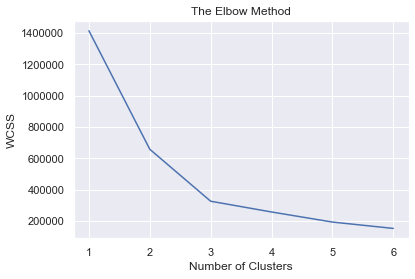

In [54]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show

## Clustering

Use 4 clusters initially.

In [49]:
kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)

## Clustering results

In [50]:
data_clustered = data.copy()
data_clustered['Clusters'] = identified_clusters

In [51]:
data_clustered

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,1,1
2,Angola,17.537368,-12.293361,4,1
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,2,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3,0
237,Yemen,47.586762,15.909280,1,1
238,South Africa,25.083901,-29.000341,4,1
239,Zambia,27.774759,-13.458242,4,1


In [52]:
data_clustered.isnull().sum()

name         0
Longitude    0
Latitude     0
continent    0
Clusters     0
dtype: int64

## Plot the data

<function matplotlib.pyplot.show(*args, **kw)>

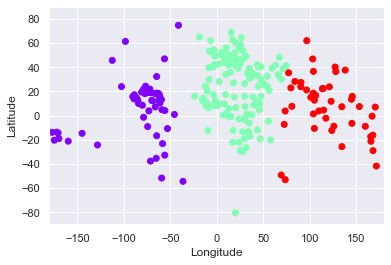

In [53]:
plt.scatter(data_clustered['Longitude'], data_clustered['Latitude'], c = data_clustered['Clusters'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.